In [8]:
#  Bismillah

#  P19-1664 Noman Siddique
#

# Assignment # 4
# Technical Analysis on Three companies 


In [9]:
import pandas as pd
import numpy as np
import datetime as dt # so that pandas can recognize dates properly
import matplotlib.pyplot as plt # for visualization
from matplotlib import style
import pandas_datareader.data as web # to collect data

In [10]:
style.use('ggplot')
tickers = ['CVNA', 'JD']
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2020, 11, 20)
returns = pd.DataFrame() # create an empty data frame, returns.
returns

Empty DataFrame
Columns: []
Index: []

# Portfolio Optimization:
Optimal portfolio has the highest sharpe ratio
- [**Data**](#Data): Extract the data online and organize it in the data frame.


## Data

In [11]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
data
# Loop will run for the first time for CVNA, extracts the data from yahoo finance and store it in data 
#frame, data. The loop will then run for JD, extracts the data from yahoo finance and replace the data
# in data frame, data. This is not the dataframe that we want at the end since it will contain data of
# only JD, the last ticker in the tickers list.

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2014-05-22  22.799999  20.240000  21.750000  20.900000  84449700  20.385664
2014-05-23  21.250000  19.940001  21.250000  20.100000  20890300  19.605352
2014-05-27  22.980000  20.250000  20.280001  22.969999  15338100  22.404722
2014-05-28  25.299999  22.799999  22.980000  24.780001  16783000  24.170179
2014-05-29  25.690001  24.240000  25.040001  25.400000   8525900  24.774921
...               ...        ...        ...        ...       ...        ...
2020-11-16  89.589996  84.139999  88.500000  85.260002  31929400  83.161804
2020-11-17  87.900002  85.690002  87.379997  86.970001  17068300  84.829720
2020-11-18  87.220001  84.400002  87.125000  86.250000  12563900  84.127441
2020-11-19  86.330002  84.720001  85.209999  86.040001  10795300  83.922607
2020-11-20  87.910004  85.379997  86.190002  87.739998  10585900  85.580772

[1639 rows x 6 columns]

In [12]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data[ticker] = data['Adj Close'].pct_change() # add a column to data frame, data, and store returns in it.

# pd.set_option('display.max_rows', None)
data
# still same number of rows as above, so values of one firm (CVNA) replace by another firm (JD).

High        Low       Open      Close    Volume  Adj Close  \
Date                                                                          
2014-05-22  22.799999  20.240000  21.750000  20.900000  84449700  20.385664   
2014-05-23  21.250000  19.940001  21.250000  20.100000  20890300  19.605352   
2014-05-27  22.980000  20.250000  20.280001  22.969999  15338100  22.404722   
2014-05-28  25.299999  22.799999  22.980000  24.780001  16783000  24.170179   
2014-05-29  25.690001  24.240000  25.040001  25.400000   8525900  24.774921   
...               ...        ...        ...        ...       ...        ...   
2020-11-16  89.589996  84.139999  88.500000  85.260002  31929400  83.161804   
2020-11-17  87.900002  85.690002  87.379997  86.970001  17068300  84.829720   
2020-11-18  87.220001  84.400002  87.125000  86.250000  12563900  84.127441   
2020-11-19  86.330002  84.720001  85.209999  86.040001  10795300  83.922607   
2020-11-20  87.910004  85.379997  86.190002  87.739998  10585900  85.580772   

                  JD  
Date                  
2014-05-22       NaN  
2014-05-23 -0.038277  
2014-05-27  0.142786  
2014-05-28  0.078798  
2014-05-29  0.025020  
...              ...  
2020-11-16 -0.074066  
2020-11-17  0.020056  
2020-11-18 -0.008279  
2020-11-19 -0.002435  
2020-11-20  0.019758  

[1639 rows x 7 columns]

In [13]:
13.972697 / 13.512726 - 1

# just for confirmation of the return above.

0.034039837705582165

In [14]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
data
# loop first running for CVNA, extracting its data from yahoo finance from the start to the end dates 
# and then storing it in a data frame, data. Next, data[ticker] = data[CVNA] column is created which
# contains percentage changes in the Adj Close of CVNA. Next, if-else is evaluated. In the if statement,
# returns.empty outputs True since the data frame, returns, is yet empty, which sets the data frame,
# returns, equal to data[[ticker]] or more precisely to data[[CVNA]]. This finishes the first loop.

# Then the loop runs for JD, extracting its data from yahoo finance from the start to the end dates
# and then storing it in a data frame, data. Next, data[ticker] = data[JD] column is created which
# is set equal to percentage changes in the Adj Close of JD. Next, if-else is evaluated. In the if
# statement,returns.empty turns out to be False this time, therefore, else is executed, where the data 
# frame, returns which already contains the data for TSLA, now takes the data from data[[ticker]] which
# is this time equal to data[[JD]]. Thus, the data frame, returns, now contains two columns. The first one
# contains percent changes (net returns) of CVNA and the second one contains the percent changes (net returns) of
# BAC.

# The data frame, data, will still contain 1,737 rows since it contains data only for BAC.

# The data frame, returns, will contain 1,737 rows but then two columns, one for TSLA and the other for
# BAC.

High        Low       Open      Close    Volume  Adj Close  \
Date                                                                          
2014-05-22  22.799999  20.240000  21.750000  20.900000  84449700  20.385664   
2014-05-23  21.250000  19.940001  21.250000  20.100000  20890300  19.605352   
2014-05-27  22.980000  20.250000  20.280001  22.969999  15338100  22.404722   
2014-05-28  25.299999  22.799999  22.980000  24.780001  16783000  24.170179   
2014-05-29  25.690001  24.240000  25.040001  25.400000   8525900  24.774921   
...               ...        ...        ...        ...       ...        ...   
2020-11-16  89.589996  84.139999  88.500000  85.260002  31929400  83.161804   
2020-11-17  87.900002  85.690002  87.379997  86.970001  17068300  84.829720   
2020-11-18  87.220001  84.400002  87.125000  86.250000  12563900  84.127441   
2020-11-19  86.330002  84.720001  85.209999  86.040001  10795300  83.922607   
2020-11-20  87.910004  85.379997  86.190002  87.739998  10585900  85.580772   

                  JD  
Date                  
2014-05-22       NaN  
2014-05-23 -0.038277  
2014-05-27  0.142786  
2014-05-28  0.078798  
2014-05-29  0.025020  
...              ...  
2020-11-16 -0.074066  
2020-11-17  0.020056  
2020-11-18 -0.008279  
2020-11-19 -0.002435  
2020-11-20  0.019758  

[1639 rows x 7 columns]

In [15]:
returns

CVNA        JD
Date                          
2014-05-22       NaN       NaN
2014-05-23       NaN -0.038277
2014-05-27       NaN  0.142786
2014-05-28       NaN  0.078798
2014-05-29       NaN  0.025020
...              ...       ...
2020-11-16 -0.005069 -0.074066
2020-11-17  0.055140  0.020056
2020-11-18  0.011688 -0.008279
2020-11-19  0.012579 -0.002435
2020-11-20  0.032159  0.019758

[1639 rows x 2 columns]

In [16]:
type(returns)

pandas.core.frame.DataFrame

## Determine the portfolio weights:

In [17]:
number_of_portfolios = 50000
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    print(weights)
    
# Loop will run the first time for 0 and put 0 in portfolio variable. Then, np.random.random_sample(2) will run
# and produce two random numbers and store them in the variable, weights. The loop then runs for 1 in portfolio
# variable, np.random.random_sample(2) generates two random numbers and store them in the variable, weights again.
# The loop runs 5 times in total from 0 to 4. Thus, the variable, weights, contain 5 sets of 2 random numbers and
# each set can be viewed as a seperate portfolio. Hence, the total number of portfolios is equal to 5.

# But now the problem is each portfolio weight is either less than or greater than 1 or 100 percent. We overcome 
# this problem in the following as:

[0.35385912 0.20345266]
[0.21601133 0.15950363]
[0.93712567 0.74989103]
[0.58630431 0.73410198]
[0.10226786 0.42347132]
[0.59823456 0.51947672]
[0.71497906 0.29042147]
[0.41338918 0.33319053]
[0.17268783 0.31141245]
[0.12783542 0.53002828]
[0.28820201 0.15231114]
[0.99376485 0.24690733]
[0.58848421 0.02204159]
[0.04227701 0.22867257]
[0.37454358 0.00985017]
[0.35657213 0.8167992 ]
[0.48955878 0.6153778 ]
[0.0292165  0.94813926]
[0.46418993 0.69439518]
[0.11740263 0.73923275]
[0.82075352 0.42734825]
[0.50119331 0.66567463]
[0.481004   0.36528025]
[0.04975066 0.86121657]
[0.41352265 0.68320525]
[0.67586642 0.73666793]
[0.67569692 0.88259055]
[0.51092747 0.28437937]
[0.12997852 0.77620526]
[0.3804814 0.0838192]
[0.81350676 0.16888711]
[0.52308532 0.2353871 ]
[0.16165547 0.8856898 ]
[0.91222827 0.4403962 ]
[0.11944218 0.6286442 ]
[0.712969   0.28910424]
[0.68776488 0.55898759]
[0.05803917 0.11457497]
[0.24073052 0.10342514]
[0.10695022 0.72164961]
[0.88045785 0.6882627 ]
[0.23495052 0.9421

In [18]:
weights

array([0.49439923, 0.65938549])

In [19]:
weights[0] + weights[1] # these will change every time we run the cells above.

1.1537847254827471

In [20]:
np.sum(weights)

1.1537847254827471

In [21]:
weights / np.sum(weights) # to impose constraint on weights to be equal to 1.

array([0.42850215, 0.57149785])

In [22]:
weights = weights / np.sum(weights)

In [23]:
weights[0] + weights[1] # Now the sum of the weights invested in both the assets is precesiely equal to 1.

1.0

In [24]:
weights = 0 # to start fresh for the following loop.
weights

0

In [25]:
number_of_portfolios = 50000
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    weights = weights / np.sum(weights)
    print(weights)
    
# Now the weights invested in each portfolio is equal to 1.

[0.50784995 0.49215005]
[0.54210436 0.45789564]
[0.54623812 0.45376188]
[0.365435 0.634565]
[0.93262453 0.06737547]
[0.22945135 0.77054865]
[0.18309926 0.81690074]
[0.76371583 0.23628417]
[0.67232186 0.32767814]
[0.27641928 0.72358072]
[0.81858282 0.18141718]
[0.76880461 0.23119539]
[0.23027908 0.76972092]
[0.52918518 0.47081482]
[0.17886544 0.82113456]
[0.14157652 0.85842348]
[0.76872012 0.23127988]
[0.29206381 0.70793619]
[0.6952349 0.3047651]
[0.78237911 0.21762089]
[0.24596026 0.75403974]
[0.44477718 0.55522282]
[0.82205615 0.17794385]
[0.13995652 0.86004348]
[0.06540256 0.93459744]
[0.61033873 0.38966127]
[0.60633104 0.39366896]
[0.51359812 0.48640188]
[0.62623618 0.37376382]
[0.41974994 0.58025006]
[0.17782263 0.82217737]
[0.76893127 0.23106873]
[0.20246781 0.79753219]
[0.2390545 0.7609455]
[0.51457473 0.48542527]
[0.44874262 0.55125738]
[0.58287912 0.41712088]
[0.33977096 0.66022904]
[0.4548247 0.5451753]
[0.43489023 0.56510977]
[0.4454293 0.5545707]
[0.30184606 0.69815394]
[0.2

In [26]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [27]:
weights = 0 # to start fresh for the following loop.
weights

0

In [28]:
number_of_portfolios = 50000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)

print(portfolio_weights)

[array([0.724, 0.276]), array([0.533, 0.467]), array([0.641, 0.359]), array([0.599, 0.401]), array([0.68, 0.32]), array([0.601, 0.399]), array([0.44, 0.56]), array([0.46, 0.54]), array([0.414, 0.586]), array([0.355, 0.645]), array([0.783, 0.217]), array([0.197, 0.803]), array([0.651, 0.349]), array([0.608, 0.392]), array([0.659, 0.341]), array([0.447, 0.553]), array([0.473, 0.527]), array([0.457, 0.543]), array([0.509, 0.491]), array([0.301, 0.699]), array([0.442, 0.558]), array([0.577, 0.423]), array([0.309, 0.691]), array([0.795, 0.205]), array([0.578, 0.422]), array([0.388, 0.612]), array([0.87, 0.13]), array([0.478, 0.522]), array([0.539, 0.461]), array([0.399, 0.601]), array([0.419, 0.581]), array([0.046, 0.954]), array([0.629, 0.371]), array([0.324, 0.676]), array([0.034, 0.966]), array([0.243, 0.757]), array([0.868, 0.132]), array([0.439, 0.561]), array([0.545, 0.455]), array([0.82, 0.18]), array([0.218, 0.782]), array([0.291, 0.709]), array([0.493, 0.507]), array([0.189, 0.811]

## Compute Annualized Portfolio Returns:

In [29]:
returns # the data frame, returns, contains daily returns of the 2 stocks.

CVNA        JD
Date                          
2014-05-22       NaN       NaN
2014-05-23       NaN -0.038277
2014-05-27       NaN  0.142786
2014-05-28       NaN  0.078798
2014-05-29       NaN  0.025020
...              ...       ...
2020-11-16 -0.005069 -0.074066
2020-11-17  0.055140  0.020056
2020-11-18  0.011688 -0.008279
2020-11-19  0.012579 -0.002435
2020-11-20  0.032159  0.019758

[1639 rows x 2 columns]

In [30]:
returns.mean() 
# generates daily mean return for the two stocks. CVNA on average generates a daily return of $0.0022 per dollar
# investment or $0.22 per 100 dollar investment.

CVNA    0.004781
JD      0.001232
dtype: float64

In [31]:
weights # the weights of both the assets in a portfolio.

array([0.785, 0.215])

In [32]:
weights[0], weights[1]

(0.785, 0.215)

In [33]:
0.002186 * weights[0] + 0.000582 * weights[1] 
# Portfolio of these weights generate daily expected return of $0.0014 per dollar investment or return of $0.14 
# per 100 dollar investment.

0.00184114

In [34]:
np.sum(returns.mean() * weights) 

# generates the portfolio's daily expected return given the means and weights. We cannot change the mean daily 
# returns but can change the weights, which will change the portfolio's expected return.

# Investing 52.7% of the total available funds in CVNA and 47.3% in JD has the expected daily portfolio return of
# $0.00143 per dollar of investment or $0.143 per 100 dollars of investment. 

0.004018127134425199

In [35]:
np.sum(returns.mean() * weights) * 252 
# 252 days since stock markets usally trade for 252 days in a year.
# generates annualized return of the portfolio. So, $1 invested in this portfolio is expected to generate a return
# of almost $0.25 in a year or $100 invested in this portfolio is expected to generate a return of almost $25 in a
# year.

1.0125680378751503

In [36]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights

([],
 [],
 [],
 [array([0.724, 0.276]),
  array([0.533, 0.467]),
  array([0.641, 0.359]),
  array([0.599, 0.401]),
  array([0.68, 0.32]),
  array([0.601, 0.399]),
  array([0.44, 0.56]),
  array([0.46, 0.54]),
  array([0.414, 0.586]),
  array([0.355, 0.645]),
  array([0.783, 0.217]),
  array([0.197, 0.803]),
  array([0.651, 0.349]),
  array([0.608, 0.392]),
  array([0.659, 0.341]),
  array([0.447, 0.553]),
  array([0.473, 0.527]),
  array([0.457, 0.543]),
  array([0.509, 0.491]),
  array([0.301, 0.699]),
  array([0.442, 0.558]),
  array([0.577, 0.423]),
  array([0.309, 0.691]),
  array([0.795, 0.205]),
  array([0.578, 0.422]),
  array([0.388, 0.612]),
  array([0.87, 0.13]),
  array([0.478, 0.522]),
  array([0.539, 0.461]),
  array([0.399, 0.601]),
  array([0.419, 0.581]),
  array([0.046, 0.954]),
  array([0.629, 0.371]),
  array([0.324, 0.676]),
  array([0.034, 0.966]),
  array([0.243, 0.757]),
  array([0.868, 0.132]),
  array([0.439, 0.561]),
  array([0.545, 0.455]),
  array([0.82, 0.1

In [37]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [38]:
weights = 0

In [39]:
number_of_portfolios = 50000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    annualized_return = np.round((annualized_return), 3)
    portfolio_return.append(annualized_return)

print(portfolio_weights)
print(portfolio_return)

[array([0.423, 0.577]), array([0.719, 0.281]), array([0.512, 0.488]), array([0.013, 0.987]), array([0.721, 0.279]), array([0.277, 0.723]), array([0.639, 0.361]), array([0.502, 0.498]), array([0.085, 0.915]), array([0.59, 0.41]), array([0.248, 0.752]), array([0.488, 0.512]), array([0.864, 0.136]), array([0.698, 0.302]), array([0.563, 0.437]), array([0.885, 0.115]), array([0.494, 0.506]), array([0.203, 0.797]), array([0.153, 0.847]), array([0.962, 0.038]), array([0.948, 0.052]), array([0.198, 0.802]), array([0.788, 0.212]), array([0.897, 0.103]), array([0.796, 0.204]), array([0.784, 0.216]), array([0.532, 0.468]), array([0.847, 0.153]), array([0.749, 0.251]), array([0.718, 0.282]), array([0.908, 0.092]), array([0.681, 0.319]), array([0.046, 0.954]), array([0.62, 0.38]), array([0.057, 0.943]), array([0.713, 0.287]), array([0.167, 0.833]), array([0.501, 0.499]), array([0.203, 0.797]), array([0.071, 0.929]), array([0.439, 0.561]), array([0.396, 0.604]), array([0.568, 0.432]), array([0.288, 

## Compute Covariance Matrix and Portfolio's Risk:

In [40]:
returns

CVNA        JD
Date                          
2014-05-22       NaN       NaN
2014-05-23       NaN -0.038277
2014-05-27       NaN  0.142786
2014-05-28       NaN  0.078798
2014-05-29       NaN  0.025020
...              ...       ...
2020-11-16 -0.005069 -0.074066
2020-11-17  0.055140  0.020056
2020-11-18  0.011688 -0.008279
2020-11-19  0.012579 -0.002435
2020-11-20  0.032159  0.019758

[1639 rows x 2 columns]

In [41]:
returns.cov()

CVNA        JD
CVNA  0.002867  0.000477
JD    0.000477  0.000715

In [42]:
returns.cov() * 252

CVNA        JD
CVNA  0.722521  0.120114
JD    0.120114  0.180117

In [43]:
covariance_matrix = returns.cov() * 252
covariance_matrix

CVNA        JD
CVNA  0.722521  0.120114
JD    0.120114  0.180117

In [44]:
weights

array([0.679, 0.321])

In [45]:
weights.T # step A in excel.

array([0.679, 0.321])

In [46]:
np.dot(covariance_matrix, weights) # step B in excel.

array([0.52914813, 0.13937499])

In [47]:
np.dot(weights.T, np.dot(covariance_matrix, weights)) # step C in excel.

0.40403094820526375

In [48]:
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
portfolio_variance

0.40403094820526375

In [49]:
standard_deviation = np.sqrt(portfolio_variance)
standard_deviation

0.6356342880975379

In [50]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.689,
  0.954,
  0.768,
  0.322,
  0.955,
  0.558,
  0.882,
  0.759,
  0.387,
  0.838,
  0.532,
  0.747,
  1.083,
  0.935,
  0.814,
  1.102,
  0.752,
  0.492,
  0.447,
  1.171,
  1.158,
  0.488,
  1.015,
  1.113,
  1.022,
  1.012,
  0.786,
  1.068,
  0.98,
  0.953,
  1.123,
  0.92,
  0.352,
  0.865,
  0.361,
  0.948,
  0.46,
  0.759,
  0.492,
  0.374,
  0.703,
  0.665,
  0.818,
  0.568,
  0.436,
  0.954,
  0.391,
  0.341,
  0.384,
  0.7,
  0.674,
  0.714,
  0.807,
  0.833,
  0.906,
  0.667,
  0.535,
  0.791,
  0.518,
  0.848,
  0.928,
  0.592,
  0.554,
  1.071,
  0.371,
  0.918,
  0.778,
  0.32,
  0.866,
  0.639,
  0.885,
  0.614,
  0.484,
  1.115,
  0.524,
  0.756,
  0.94,
  0.751,
  0.555,
  0.69,
  0.48,
  0.465,
  0.765,
  0.47,
  1.0,
  1.203,
  0.762,
  0.523,
  0.642,
  0.81,
  1.0,
  0.446,
  0.71,
  0.42,
  0.895,
  1.125,
  0.793,
  0.665,
  0.886,
  0.971,
  0.825,
  0.786,
  1.047,
  0.862,
  0.837,
  0.695,
  0.583,
  0.725,
  0.764,
  0.636,
  0.792,
  0.773,
  1.123,


In [51]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [52]:
weights = 0
annualized_return = 0

In [53]:
number_of_portfolios = 500  # our jupyter is crashed, when we set the limit to 50000 
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)

[array([0.394, 0.606]), array([0.541, 0.459]), array([0.643, 0.357]), array([0.295, 0.705]), array([0.431, 0.569]), array([0.778, 0.222]), array([0.46, 0.54]), array([0.955, 0.045]), array([0.896, 0.104]), array([0.572, 0.428]), array([0.432, 0.568]), array([0.401, 0.599]), array([0.491, 0.509]), array([0.55, 0.45]), array([0.221, 0.779]), array([0.087, 0.913]), array([0.425, 0.575]), array([0.313, 0.687]), array([0.227, 0.773]), array([0.154, 0.846]), array([0.238, 0.762]), array([0.548, 0.452]), array([0.697, 0.303]), array([0.271, 0.729]), array([0.419, 0.581]), array([0.569, 0.431]), array([0.416, 0.584]), array([0.5, 0.5]), array([0.255, 0.745]), array([0.899, 0.101]), array([0.012, 0.988]), array([0.114, 0.886]), array([0.359, 0.641]), array([0.741, 0.259]), array([0.956, 0.044]), array([0.971, 0.029]), array([0.433, 0.567]), array([0.374, 0.626]), array([0.189, 0.811]), array([0.943, 0.057]), array([0.338, 0.662]), array([0.329, 0.671]), array([0.462, 0.538]), array([0.57, 0.43]

## Compute Sharpe Ratio

In [54]:
annualized_return # the portfolio's expected annual return.

0.7317364692721073

In [55]:
rf

0

In [56]:
annualized_return - rf

0.7317364692721073

In [57]:
portfolio_standard_deviation

0.5201382304158232

In [58]:
shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation

In [59]:
shrp_ratio
# risk premium per unit of risk. The higher the shrp ratio is, the better it is.

1.4068115483207655

In [60]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([0.6628701292006606,
  0.7943422329734227,
  0.8855677743667677,
  0.5743276919659432,
  0.6959617471570699,
  1.0063074615050187,
  0.721898420690472,
  1.1646106068640585,
  1.1118428917443786,
  0.8220676426125765,
  0.696856115209946,
  0.6691307055707921,
  0.749623830329626,
  0.802391545449306,
  0.5081444560531242,
  0.3882991369677493,
  0.6905955388398144,
  0.5904263169177101,
  0.5135106643703798,
  0.4482217965104367,
  0.5233487129520151,
  0.8006028093435541,
  0.933863649222068,
  0.5528628586969209,
  0.6852293305225587,
  0.8193845384539487,
  0.682546226363931,
  0.7576731428055093,
  0.538552969850906,
  1.1145259959030065,
  0.3212215330020543,
  0.41244707439539946,
  0.6315672473500028,
  0.973215843548609,
  1.1655049749169346,
  1.1789204957100736,
  0.6977504832628219,
  0.6449827681431418,
  0.4795246783610944,
  1.1538781902295474,
  0.6127855182396084,
  0.604736205763725,
  0.723687156796224,
  0.8202789065068246,
  0.7442576220123703,
  0.695961747157069

In [61]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [62]:
weights = 0
annualized_return = 0

In [63]:
number_of_portfolios = 5000  # our jupyter lab crashed when we set no_of_portfolio to 50000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

[array([0.184, 0.816]), array([0.502, 0.498]), array([0.948, 0.052]), array([0.708, 0.292]), array([0.496, 0.504]), array([0.125, 0.875]), array([0.35, 0.65]), array([0.566, 0.434]), array([0.655, 0.345]), array([0.897, 0.103]), array([0.202, 0.798]), array([0.589, 0.411]), array([0.622, 0.378]), array([0.383, 0.617]), array([0.545, 0.455]), array([0.393, 0.607]), array([0.521, 0.479]), array([0.145, 0.855]), array([0.318, 0.682]), array([0.431, 0.569]), array([0.278, 0.722]), array([0.663, 0.337]), array([0.083, 0.917]), array([0.985, 0.015]), array([0.088, 0.912]), array([0.391, 0.609]), array([0.12, 0.88]), array([0.492, 0.508]), array([0.505, 0.495]), array([0.334, 0.666]), array([0.259, 0.741]), array([0.803, 0.197]), array([0.51, 0.49]), array([0.556, 0.444]), array([0.92, 0.08]), array([0.504, 0.496]), array([0.342, 0.658]), array([0.804, 0.196]), array([0.274, 0.726]), array([0.215, 0.785]), array([0.147, 0.853]), array([0.512, 0.488]), array([0.028, 0.972]), array([0.785, 0.21

In [64]:
# Based on the Sharpe Ratio, the portfolio 5 is the best among all the five portfolios since it has the highest Sharpe 
# Ratio, thus, the highest risk premium it offers per unit of risk.

In [65]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(list, list, list, list)

In [66]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)
# change the lists to numpy arrays for better data manipulations.

In [67]:
print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

# list items are seperated by commas, where arrays elements are not it appears.

[[0.184 0.816]
 [0.502 0.498]
 [0.948 0.052]
 ...
 [0.532 0.468]
 [0.317 0.683]
 [0.711 0.289]]
[0.47505284 0.75946188 1.15835003 ... 0.78629292 0.59400379 0.9463848 ]
[0.4248085  0.53554072 0.81342576 ... 0.55113668 0.45677117 0.65548054]
[1.11827526 1.41812163 1.42403904 ... 1.426675   1.30044064 1.44380305]


In [68]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [69]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
portfolio_metrics

[array([0.47505284, 0.75946188, 1.15835003, ..., 0.78629292, 0.59400379,
        0.9463848 ]),
 array([0.4248085 , 0.53554072, 0.81342576, ..., 0.55113668, 0.45677117,
        0.65548054]),
 array([1.11827526, 1.41812163, 1.42403904, ..., 1.426675  , 1.30044064,
        1.44380305]),
 array([[0.184, 0.816],
        [0.502, 0.498],
        [0.948, 0.052],
        ...,
        [0.532, 0.468],
        [0.317, 0.683],
        [0.711, 0.289]])]

In [70]:
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df

# row 0 is portfolio_return, row 1 is portfolio_risk, row 3 is sharpe_ratio, and row 4 is portfolio_weights.

0               1               2               3     \
0        0.475053        0.759462         1.15835        0.943702   
1        0.424809        0.535541        0.813426        0.653601   
2        1.118275        1.418122        1.424039        1.443849   
3  [0.184, 0.816]  [0.502, 0.498]  [0.948, 0.052]  [0.708, 0.292]   

             4               5             6               7     \
0        0.754096        0.422285      0.623518        0.816701   
1        0.532501        0.418887      0.468252        0.569562   
2        1.416139        1.008113      1.331586        1.433912   
3  [0.496, 0.504]  [0.125, 0.875]  [0.35, 0.65]  [0.566, 0.434]   

             8               9     ...            4990            4991  \
0          0.8963        1.112737  ...        1.116315        0.696856   
1         0.62105        0.778108  ...        0.780856        0.501892   
2        1.443201        1.430055  ...        1.429604        1.388457   
3  [0.655, 0.345]  [0.897, 0.103]  ...  [0.901, 0.099]  [0.432, 0.568]   

             4992            4993            4994            4995  \
0        0.923131        0.992892        0.865892        0.636039   
1        0.639322        0.688612        0.600871        0.473499   
2        1.443923        1.441874        1.441062        1.343274   
3  [0.685, 0.315]  [0.763, 0.237]  [0.621, 0.379]  [0.364, 0.636]   

             4996            4997            4998            4999  
0        0.449116        0.786293        0.594004        0.946385  
1        0.421225        0.551137        0.456771        0.655481  
2        1.066215        1.426675        1.300441        1.443803  
3  [0.155, 0.845]  [0.532, 0.468]  [0.317, 0.683]  [0.711, 0.289]  

[4 rows x 5000 columns]

In [71]:
portfolio_df = portfolio_df.T
portfolio_df

# now column 0 is portfolio_return, column 1 is portfolio_risk, column 2 is sharpe_ratio, and column 4 is portfolio
# _weights.

0         1         2               3
0     0.475053  0.424809  1.118275  [0.184, 0.816]
1     0.759462  0.535541  1.418122  [0.502, 0.498]
2      1.15835  0.813426  1.424039  [0.948, 0.052]
3     0.943702  0.653601  1.443849  [0.708, 0.292]
4     0.754096  0.532501  1.416139  [0.496, 0.504]
...        ...       ...       ...             ...
4995  0.636039  0.473499  1.343274  [0.364, 0.636]
4996  0.449116  0.421225  1.066215  [0.155, 0.845]
4997  0.786293  0.551137  1.426675  [0.532, 0.468]
4998  0.594004  0.456771  1.300441  [0.317, 0.683]
4999  0.946385  0.655481  1.443803  [0.711, 0.289]

[5000 rows x 4 columns]

In [72]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

Return      Risk    Sharpe         Weights
0     0.475053  0.424809  1.118275  [0.184, 0.816]
1     0.759462  0.535541  1.418122  [0.502, 0.498]
2      1.15835  0.813426  1.424039  [0.948, 0.052]
3     0.943702  0.653601  1.443849  [0.708, 0.292]
4     0.754096  0.532501  1.416139  [0.496, 0.504]
...        ...       ...       ...             ...
4995  0.636039  0.473499  1.343274  [0.364, 0.636]
4996  0.449116  0.421225  1.066215  [0.155, 0.845]
4997  0.786293  0.551137  1.426675  [0.532, 0.468]
4998  0.594004  0.456771  1.300441  [0.317, 0.683]
4999  0.946385  0.655481  1.443803  [0.711, 0.289]

[5000 rows x 4 columns]

## Everything Together:

In [73]:
returns, portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights, annualized_return
# the data carried forward from previous work. It needs to be deleted to run the following loops.

(                CVNA        JD
 Date                          
 2014-05-22       NaN       NaN
 2014-05-23       NaN -0.038277
 2014-05-27       NaN  0.142786
 2014-05-28       NaN  0.078798
 2014-05-29       NaN  0.025020
 ...              ...       ...
 2020-11-16 -0.005069 -0.074066
 2020-11-17  0.055140  0.020056
 2020-11-18  0.011688 -0.008279
 2020-11-19  0.012579 -0.002435
 2020-11-20  0.032159  0.019758
 
 [1639 rows x 2 columns],
 array([0.47505284, 0.75946188, 1.15835003, ..., 0.78629292, 0.59400379,
        0.9463848 ]),
 array([0.4248085 , 0.53554072, 0.81342576, ..., 0.55113668, 0.45677117,
        0.65548054]),
 array([1.11827526, 1.41812163, 1.42403904, ..., 1.426675  , 1.30044064,
        1.44380305]),
 array([[0.184, 0.816],
        [0.502, 0.498],
        [0.948, 0.052],
        ...,
        [0.532, 0.468],
        [0.317, 0.683],
        [0.711, 0.289]]),
 0,
 array([0.711, 0.289]),
 0.9463848019623311)

In [74]:
returns = pd.DataFrame()
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0
weights = 0
annualized_return = 0

In [75]:
tickers = ['CVNA', 'JD']
returns = pd.DataFrame()

In [76]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
        
returns

CVNA        JD
Date                          
2014-05-22       NaN       NaN
2014-05-23       NaN -0.038277
2014-05-27       NaN  0.142786
2014-05-28       NaN  0.078798
2014-05-29       NaN  0.025020
...              ...       ...
2020-11-16 -0.005069 -0.074066
2020-11-17  0.055140  0.020056
2020-11-18  0.011688 -0.008279
2020-11-19  0.012579 -0.002435
2020-11-20  0.032159  0.019758

[1639 rows x 2 columns]

In [77]:
number_of_portfolios = 5000 #our jupyter lab crashed when we ser portfolio's no. 10 50000 (insufficient RAM)
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out the print statements since this is too much output.

In [78]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [79]:
# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out these print statement since this will be too much of the output.

In [80]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
#portfolio_metrics

# comment out printing of the portfolio_metrics due too much output.

In [81]:
portfolio_df = pd.DataFrame(portfolio_metrics)
#portfolio_df

In [82]:
portfolio_df = portfolio_df.T
#portfolio_df

In [83]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

Return      Risk    Sharpe         Weights
0     0.915082  0.633797   1.44381  [0.676, 0.324]
1     0.753201  0.531997    1.4158  [0.495, 0.505]
2     0.681652  0.494366   1.37884  [0.415, 0.585]
3     1.036716  0.720714  1.438458  [0.812, 0.188]
4     0.629779  0.470848   1.33754  [0.357, 0.643]
...        ...       ...       ...             ...
4995  0.635145  0.473117  1.342468  [0.363, 0.637]
4996  0.825645  0.575122    1.4356  [0.576, 0.424]
4997  1.182498  0.832355  1.420666  [0.975, 0.025]
4998  0.313172  0.423984  0.738641  [0.003, 0.997]
4999  1.027772  0.714099  1.439258  [0.802, 0.198]

[5000 rows x 4 columns]

### Identify a minimum risk portfolio:

In [84]:
portfolio_df

Return      Risk    Sharpe         Weights
0     0.915082  0.633797   1.44381  [0.676, 0.324]
1     0.753201  0.531997    1.4158  [0.495, 0.505]
2     0.681652  0.494366   1.37884  [0.415, 0.585]
3     1.036716  0.720714  1.438458  [0.812, 0.188]
4     0.629779  0.470848   1.33754  [0.357, 0.643]
...        ...       ...       ...             ...
4995  0.635145  0.473117  1.342468  [0.363, 0.637]
4996  0.825645  0.575122    1.4356  [0.576, 0.424]
4997  1.182498  0.832355  1.420666  [0.975, 0.025]
4998  0.313172  0.423984  0.738641  [0.003, 0.997]
4999  1.027772  0.714099  1.439258  [0.802, 0.198]

[5000 rows x 4 columns]

In [85]:
portfolio_df['Risk'].astype(float).idxmin() # returns the row index of minimum risk, which in this case is 1.

546

In [86]:
portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()] 
#.iloc gets 1, so portfolio_df.iloc[1] produces the entire row indexed 1.

Return           0.391877
Risk             0.417949
Sharpe           0.937618
Weights    [0.091, 0.909]
Name: 546, dtype: object

In [87]:
min_risk_portfolio = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
min_risk_portfolio

# among all the known portfolios, this is the one with the minimum risk.

Return           0.391877
Risk             0.417949
Sharpe           0.937618
Weights    [0.091, 0.909]
Name: 546, dtype: object

In [88]:
max_return_portfolio = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
max_return_portfolio

# among all the known portfolios, this is the one with the maximum return.

Return       1.204857
Risk         0.850012
Sharpe       1.417459
Weights    [1.0, 0.0]
Name: 443, dtype: object

In [89]:
max_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]
max_sharpe_portfolio

# among all the known portfolios, this is the one with the maximum sharpe ratio.

Return           0.930286
Risk             0.644263
Sharpe           1.443955
Weights    [0.693, 0.307]
Name: 1492, dtype: object

In [90]:
print('Minimum Risk Portfolio')
print(min_risk_portfolio)
print(tickers)
print('')

print('Maximum Return Portfolio')
print(max_return_portfolio)
print(tickers)
print('')

print('Maximum Sharpe Ratio Portfolio')
print(max_sharpe_portfolio)
print(tickers)
print('')

Minimum Risk Portfolio
Return           0.391877
Risk             0.417949
Sharpe           0.937618
Weights    [0.091, 0.909]
Name: 546, dtype: object
['CVNA', 'JD']

Maximum Return Portfolio
Return       1.204857
Risk         0.850012
Sharpe       1.417459
Weights    [1.0, 0.0]
Name: 443, dtype: object
['CVNA', 'JD']

Maximum Sharpe Ratio Portfolio
Return           0.930286
Risk             0.644263
Sharpe           1.443955
Weights    [0.693, 0.307]
Name: 1492, dtype: object
['CVNA', 'JD']



### Visualization:

In [91]:
# portfolio_risk # will be shown along x-axis. Commented out due too much output.

In [92]:
# portfolio_return # will be shown along y-axis. Commented out due too much output.

In [93]:
# portfolio_return / portfolio_risk # commented out due to too much output.

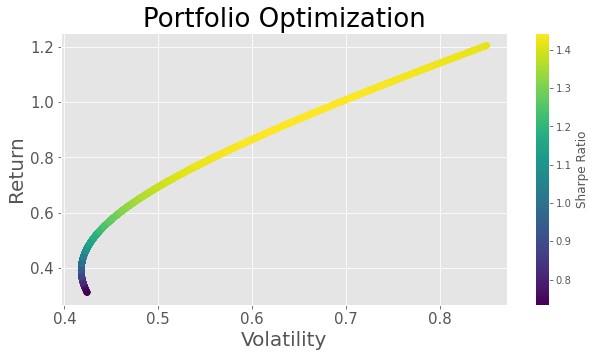

In [94]:
plt.figure(figsize = (10, 5))
plt.scatter(portfolio_risk, portfolio_return, c = portfolio_return / portfolio_risk) # c for colorbar based on sharpe.

plt.title('Portfolio Optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.colorbar(label = 'Sharpe Ratio')

plt.show()

# Note first run for TSLA and BCA for 5 portfolios, and then 100 portfolios and then 10000 portfolios.
# Finally, make it 5 stocks and 20000 portfolios.


### Comparison with individual assets:

In [95]:
returns

CVNA        JD
Date                          
2014-05-22       NaN       NaN
2014-05-23       NaN -0.038277
2014-05-27       NaN  0.142786
2014-05-28       NaN  0.078798
2014-05-29       NaN  0.025020
...              ...       ...
2020-11-16 -0.005069 -0.074066
2020-11-17  0.055140  0.020056
2020-11-18  0.011688 -0.008279
2020-11-19  0.012579 -0.002435
2020-11-20  0.032159  0.019758

[1639 rows x 2 columns]

In [96]:
returns.mean() # daily returns of the two stocks.

CVNA    0.004781
JD      0.001232
dtype: float64

In [97]:
returns.std() # dailty standard deviation of the two stocks.

CVNA    0.053546
JD      0.026735
dtype: float64

In [98]:
returns.mean() * 252 # annual returns of the two stocks.

CVNA    1.204857
JD      0.310489
dtype: float64

In [99]:
returns.std() * 252 # annual standard deviations of the two stocks.

CVNA    13.493524
JD       6.737165
dtype: float64

In [100]:
returns.std() * np.sqrt(252) # annual standard deviations of the two stocks. This one seems more reasonable. 
# check out this link: https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx

CVNA    0.850012
JD      0.424402
dtype: float64